$$\textbf{Blatt 07 - Praktische Optimierung - Adrian Lentz, Robert}$$

Lösungen und Erklärungen für Blatt 07. $$\newline$$
Adrian Lentz - Matrikelnummer: 258882 $$\newline$$
Robert Schönewald - Matrikelnummer: 188252

$$\textbf{Aufgabe 7.1}$$


Es soll die Funktion:
$ f(x,y)= x \cdot y $
unter der Nebenbedingung: $x-y=3$
optimiert werden. 
$\newline$

Dabei kann durch das Verfahren der Elimination der Variable, die Funktion geschrieben werden als: $\newline$

$x=y+3$ $\newline$
$f(y+3,y)=(y+3) \cdot y$ $\newline$
$f(y+3,y)=y^{2} + 3\cdot y $ $\newline$

Es zeigt sich hierdurch, dass die Optimierung analytisch lösbar ist, weswegen im nächsten Schritt die Ableitung berechnet wird: $\newline$
 
$\frac{d}{dy} (y^{2}+3y) = 2y + 3$ $\newline$
$2y + 3 =0 $ $\newline$
$y = -\frac{3}{2} $ $\newline$

Einsetzen in die Nebenbedingung: $\newline$
$ x =-\frac{3}{2} + 3 = \frac{3}{2} $ $\newline$

Somit liegt das Optimum bei : $(x,y)=(\frac{3}{2},-\frac{3}{2})$ und der Funktionswert $f(\frac{3}{2},-\frac{3}{2}) = -\frac{9}{4}$ $\newline$

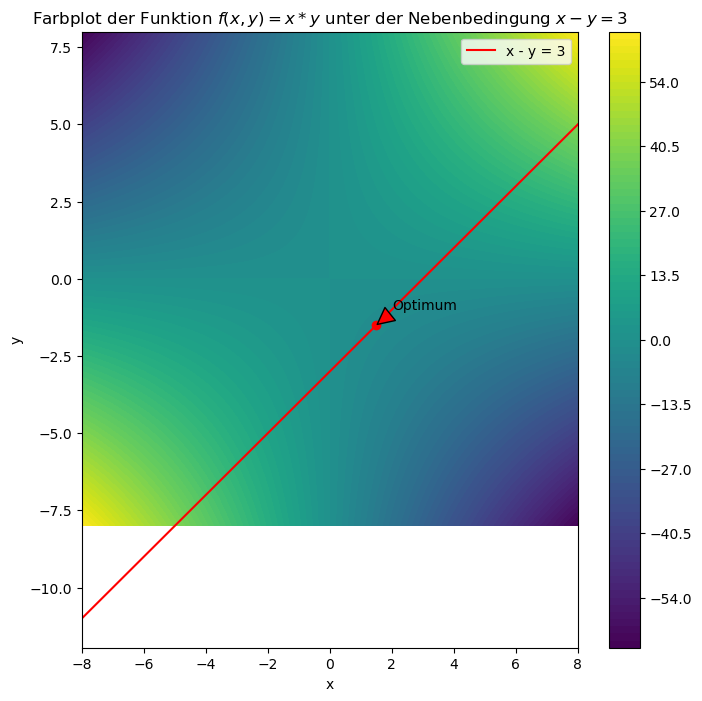

In [1]:
'Grafische Darstellung der Funktion unter der Nebenbedingung'
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x * y

x = np.linspace(-8, 8, 400)
y = np.linspace(-8, 8, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

optimum_x = 3/2
optimum_y = -3/2
optimum_z = f(optimum_x, optimum_y)

# Plot erstellen
plt.figure(figsize=(8, 8))
cp = plt.contourf(X, Y, Z, levels=100, cmap='viridis')
plt.colorbar(cp)

# Nebenbedingung 
x_constraint = np.linspace(-8, 8, 400)
y_constraint = x_constraint - 3
plt.plot(x_constraint, y_constraint, 'r-', label='x - y = 3')

# Optimum 
plt.plot(optimum_x, optimum_y, 'ro') 
plt.annotate('Optimum', xy=(optimum_x, optimum_y), xytext=(optimum_x + 0.5, optimum_y + 0.5),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('Farbplot der Funktion $f(x, y) = x*y$ unter der Nebenbedingung $x - y = 3$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

Die Abbildung zeigt eine Farbcodierte Karte der Funktion, sodass hohe Werte in dunkel blauen Bereichen zu erkennen sind und niedrige Funktionswerte in hell grünen Bereichen. Zudem ist die Nebenbedingung als rote Linie eingezeichnet und das berechnete Optimum. $\newline$
Der untere Bereich in der Abbildung ist leider nicht eingefärbt, jedoch liegt dieser bereits relativ weit entfernt vom Optimum.

$$\textbf{Aufgabe 7.2}$$


In [2]:
import numpy as np

LOWER = -10
UPPER = 10

# Zielfunktion f:
def f(x):
    return x[0]**3 * np.sin(x[0]-1) - x[1]**3 * np.cos(x[1])

In [3]:
'Reparatur-Methoden'
def repair_to_bounds(x, LOWER, UPPER): #Falls Wert kleiner/größer als Grenze ist , wird auf Grenzwert gesetzt
    return np.maximum(np.minimum(x, UPPER), LOWER)

def repair_modulo(x, LOWER, UPPER):  #Differenz zwischen den Wert und der Grenze wird durch Modulo-Operator berechnet und auf die untere Grenze addiert
    return LOWER + np.mod(x - LOWER, UPPER - LOWER)

def repair_reflect(x, LOWER, UPPER):  
    while np.any(x < LOWER) or np.any(x > UPPER):  #Wenn Wert kleiner/größer als untere/obere Grenze ist, wird Wert gespiegelt an die jeweilige Grenze
        x = np.where(x < LOWER, LOWER + (LOWER - x), x)
        x = np.where(x > UPPER, UPPER - (x - UPPER), x)
    return x

In [4]:
# (1 + lambda)-EA:
def one_lambda_ea(f, lambda_val, parent,
                  lower, upper, method="plus",
                  sigma0=5, tau=0.1, evals=100,repair_method='bounds'):  #Anpassung der Parameter
    
    # initialize values:
    fitness_p = f(parent)
    evals -= 1
    
    repair_functions={"bounds":repair_to_bounds, "modulo":repair_modulo, "reflect":repair_reflect}   #Auswahl der verschiedenen Reparatur-Methoden

    repair=repair_functions[repair_method]

    while evals > 0:
        # schwefel method:
        sigma0 *= np.exp(np.random.normal(loc=0, scale=tau))
        lambda_val = min(lambda_val, evals)
        children = parent + sigma0 * np.random.normal(size=(lambda_val, len(parent)))
        
        for i in range(len(children)):
            children[i]=repair(children[i],lower,upper)

        # evaluate children:
        fitness_c = np.apply_along_axis(f, 1, children)
        evals -= lambda_val
        
        # selection for next generation:
        if method == "plus":   #Es wird immer plus-Methode gewählt
            population = np.concatenate(
                (np.expand_dims(parent, axis=0), children))
            fitness_all = np.concatenate(
                (np.array([fitness_p]), fitness_c))
            min_ind = np.argmin(fitness_all)
            parent = population[min_ind]
            fitness_p = fitness_all[min_ind]
        else:
            min_ind = np.argmin(fitness_c)
            parent = children[min_ind]
            fitness_p = fitness_c[min_ind]
    
    # return best values found:
    return {'x': parent, 'fx': fitness_p}

In [5]:
# Test the EA-Algorithm (alt)
one_lambda_ea(f, 2, [0,0], LOWER, UPPER, 'plus', 0.1, 1.0)

{'x': array([6.36390341, 6.16994149]), 'fx': -438.31493003675416}

In [6]:
from itertools import product

# 20 gleichverteilte Startwerte (Ur-Eltern) ziehen
np.random.seed(123)
start_values = np.random.uniform(LOWER, UPPER, size=(20,2))

# Parameterkombinationen:
lambda_vals = [5]
sigma0_vals = [5]
tau_vals = [0.1]
methods = ["plus"]
repair_method=["bounds","modulo","reflect"]

params = list(product(lambda_vals, sigma0_vals, tau_vals, methods,repair_method))

In [7]:
# Ergebnisliste:
results = []

# Optimierung für jede Parameterkombination:
for lambda_val, sigma0, tau, method, repair_method in params:
    fxs = []
    # Optimierung für 20 zufällige Startwerte, 20 Wdhl.
    for start in start_values:
        for _ in range(20):
            result = one_lambda_ea(f, lambda_val, start,
                                   LOWER, UPPER, method,
                                   sigma0, tau,repair_method=repair_method)
            fxs.append(result['fx'])
    # Median der erreichten Zielfunktionswerte berechnen:
    median_fx = np.median(fxs)
    min_fx = np.min(fxs)
    max_fx = np.max(fxs)
    results.append({'lambda': lambda_val, 'sigma0': sigma0,
                    'tau': tau, 'method': method, 'repair_method':repair_method,
                    'median_fx': median_fx,
                    'min_fx': min_fx, 'max_fx': max_fx})

In [8]:
import pandas as pd

df_results = pd.DataFrame(results)\
    .sort_values(by=['median_fx'])\
    .applymap(lambda x: x if type(x) is str else np.round(x, 2))
df_results

/tmp/ipykernel_7033/3668739317.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: x if type(x) is str else np.round(x, 2))


,lambda,sigma0,tau,method,repair_method,median_fx,min_fx,max_fx
0,5,5,0.1,plus,bounds,-1839.06,-1878.60,-316.09
1,5,5,0.1,plus,modulo,-1110.95,-1869.40,-719.33
2,5,5,0.1,plus,reflect,-1085.16,-1877.79,-285.32


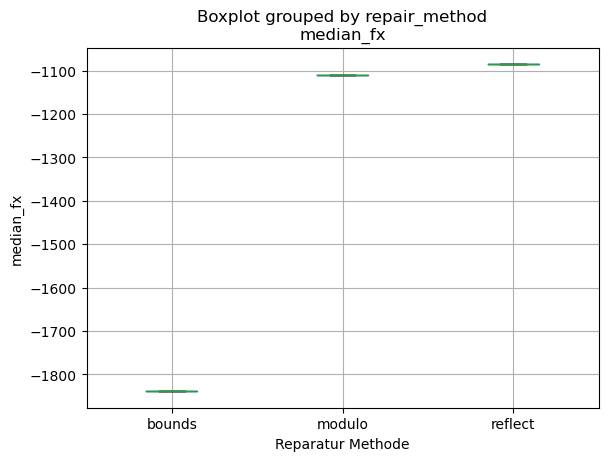

In [9]:
import matplotlib.pyplot as plt

# Erstellung des Boxplots
df_results.boxplot(column='median_fx', by='repair_method')
plt.xlabel('Reparatur Methode')
plt.ylabel('median_fx')

# Anzeige des Boxplots
plt.show()

In der Abbildung ist zu erkennen, dass für eine Minimierungsproblem, sowohl die Reparatur-Methode des Modulo-Operator, als auch die Achsenspiegelung bessere median-Werte erzielen, als die Reparatur-Methode des Randes. $\newline$
Hierbei würden jeweils 20 zufällige Startwerte und 20 Wiederholungen pro Reparatur-Methode durchgeführt und der Median-Wert berechnet. $\newline$
Für diese eine festgelegte Parameter Kombination, scheint die Reparatur-Methode des Randes nicht optimal zu sein. $\newline$
Ein mögliches Problem der Achsenspiegelung wäre eine Endlosschleife, wenn die reflektierten Werte immer außerhalb des Grenzbereichs liegen würden. 
